<a href="https://colab.research.google.com/github/yannluethi/BINA/blob/main/Case-Study/Python/BINA_Case-Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To Dos:

*  Map - Fabio
*  Verspätungen berechnen (df bereinigt, df verspaetung, df ausfall) - Allan X
* Ideen sammeln zu Plots/Darstellungen (sanbox)- Alle
 * Verspätungen pro Wochentag - Allan X
 * Verspätungen pro Zuglinie - Fabio
 * Verspätungen pro Verkehrsmittel -> IR, IC etc.? - Fabio
 * Regressionsanalyse - Ist der Wochentag ein predictor für Verspätungen? - Allan
 * Verspätungen pro Tageszeit - Yann
 * Ausfälle pro Wochentag - Allan
 * Ausfälle pro Tageszeit - Yann
 * Ausfälle pro Zuglinie - Fabio
 * Wieviel Prozent der Ausfälle/Verspätungen liegen in den Schulferien - Allan

Später:
* Code bereingien (import, initalisieren, Kommentare, Einrückungen, etc.)
* Texte / Beschreibung (Redundanzen vermeiden)
* Collecting data -> Daten beschreiben -> df.head ()



# Generelle Struktur des Notebooks
## Step 1:
* Einleitung und Ausgangslage - Fabio
* Abgrenzung

## Step 2:
* Datengrundlage
* Datenaufbereitung
  * SBB-Daten - Allan
  * Alternative Aufbereitung SBB-Daten - Fabio
  * Schulferien - Fabio
  * Geodaten - Fabio
  * GitHub-Integration - Yann
* Datenstruktur
* ERD

## Step 3 & 4:
* Bereinigung der Daten - Allan
* Bestimmen der Periodizitäten (Schulferien) inkl. Visualisierung - Allan
* Visualisierung der Zuglinien/Haltestellen inkl. Auflistung - Fabio
* Berechnung der Verspätungen - Allan

### Analyse Verspätungen
* Verspätungen vs. gesamte Anzahl Zugfahrten
* Verteilung der Verspätungen allgemein in Bell-Curve/Histogramm - Allan
* Verspätungen in den Schulferien - Allan
* Verspätungen pro Monat - Yann
* Verspätungen pro Wochentag - Allan
* Verspätungen pro Tageszeit - Yann
* Verspätungen pro Zuglinie - Fabio

### Analyse Ausfälle
* Ausfälle vs. gesamte Anzahl Zugfahrten
* Verteilung der Ausfälle allgemein in Bell-Curve/Histogramm - Allan
* Ausfälle in den Schulferien - Allan
* Ausfälle pro Monat - Yann
* Ausfälle pro Wochentag - Allan
* Ausfälle pro Tageszeit - Yann
* Ausfälle pro Zuglinie - Fabio

## Fazit und Ausblick
* Empfehlungen - Alle

#<font color='blue'>Verspätungen am Bahnhof Flughafen Zürich</font>

### BINA - Business Intelligence & Analytics (FS24)
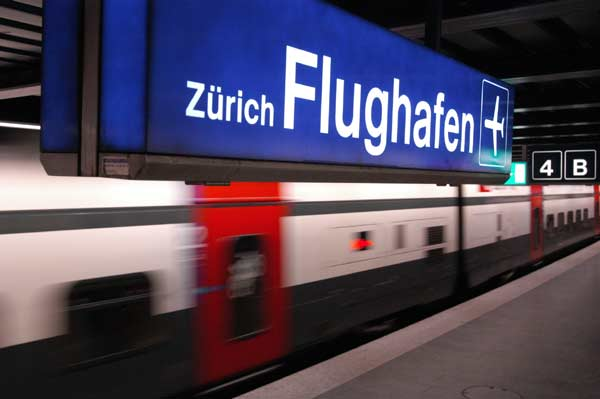

###Studierende
&nbsp;Yann Lüthi

&nbsp;Allan McGee

&nbsp;Fabio Spaar

###Dozent
&nbsp;Daniel Benninger

#Five-Step Framework - From Data to Decision
Das Vorgehen für die vorliegende Case Study richtet sich nach der CPA Management Accounting Guideline "From Data to Decision". Die Guideline enthält fünf Schritte, welche eine systematische Herangehensweise und Anleitung bieten, um Daten zu analysieren, zu interpretieren und fundierte Entscheidungen zu treffen. Nachfolgend werden die fünf Schritte erläutert:

* **Step 1: Defining objectives and information needs:** Definition der Fragestellung oder des Problems, das adressiert werden soll. Dies könnte sich auf ein spezifisches geschäftliches Szenario, eine Branche oder eine organisatorische Herausforderung beziehen. Bestimmen, welche spezifischen Informationen benötigt werden, um die Fragestellung zu beantworten oder das Problem zu lösen.
* **Step 2: Collecting data:** Ermitteln welche Datenquellen verfügbar sind und genutzt werden können, um die benötigten Informationen zu sammeln. Dies könnte Unternehmensdaten, Branchenberichte, akademische Publikationen oder Datenbanken umfassen. Sammeln der Daten, wobei beachtet werden muss, dass sie relevant, aktuell und so präzise wie möglich sind.
* **Step 3: Analyzing data:** Geeignete analytische Methoden anwenden, um die gesammelten Daten zu untersuchen. Interpretieren der Analyseergebnisse im Kontext der Case Study, um verständliche und aussagekräftige Schlussfolgerungen daraus ziehen zu können.
* **Step 4:Presenting information:** Entwickeln einer klaren und überzeugenden Darstellung der Ergebnisse, die die wichtigsten Erkenntnisse, Schlussfolgerungen und Empfehlungen hervorhebt.
* **Step 5: Making data-driven decision:** Formulieren konkreter Empfehlungen für Entscheidungen oder Massnahmen, die ergriffen werden sollten. Entwerfen von möglichen Umsetzungsschritten, welche zur Lösung der ursprünglichen Fragestellung oder des Problems beitragen können.

Für die Bearbeitung der Case Study sind die Schritte 1-4 relevant. Entsprechend wird der Inhalt des Jupyter Notebooks nach diesen vier Schritten strukturiert.


# Step 1: Defining objectives and information needs

## Einleitung und Ausgangslage
Die Schweizerische Bundesbahnen (SBB) gelten weltweit als eines der zuverlässigsten Bahnunternehmen. Dennoch sind Verspätungen im öffentlichen Verkehr unvermeidlich, und auch die SBB sind davon nicht ausgenommen. In diesem Kontext ist es interessant, einen genaueren Blick auf die Gründe für Verspätungen bei der SBB zu werfen und zu erfahren, wie die Bundesbahnen mit diesen Herausforderungen umgeht. Trotz ihrer hohen Pünktlichkeitsrate ist die SBB stets bestrebt, ihre Servicequalität zu verbessern.

Im Kontext des Moduls Binar plant die SBB eine gründliche Analyse der Zugfahrzeiten aufgrund negativer Kunden-, bzw. Passagierrückmeldungen, um Massnahmen zur Verbesserung der Pünktlichkeit und Zuverlässigkeit abzuleiten. Speziell für den Bahnhof Flughafen Zürich sollen Analysen durchgeführt werden, um etwaige Herausforderungen zu identifizieren und die Effizienz des Fahrplans zu steigern. Die gewonnenen Erkenntnisse werden als Grundlage für mögliche Anpassungen im Fahrplan, Infrastrukturverbesserungen und Schulungen dienen, um die Zufriedenheit zu erhöhen und die Gesamterfahrung der Fahrgäste zu optimieren.

Die Abfahrts- und Ankunftszeiten im Zugverkehr können durch verschiedene Faktoren beeinflusst werden, darunter Wochentage, Ferien und Jahreszeiten. Wochentage können unterschiedliche Verkehrsaufkommen hervorrufen, während Ferien und Jahreszeiten zu veränderten Reisemustern und infrastrukturellen Herausforderungen führen können. Die Analyse dieser Faktoren ist entscheidend, um Schwachstellen im Fahrplan zu identifizieren und Strategien zur Anpassung an dynamische Anforderungen zu entwickeln.

## Abgrenzung
Die Projektgruppe legt dabei den Fokus auf den Bahnhof Flughafen Zürich. Dieser Bahnhof eigent sich gut für die Analyse, da er ein hohes Passagieraufkommen aufweist und gewisse Abhängigkeiten zum Flugverkehr aufweist.

# Step 2: Collecting Data

## Datengrundlage
Für die Analyse der Fahrdaten des Bahnhofs Flughafen Zürich dient die Open-Data-Plattform Mobilität Schweiz als umfassende Datengrundlage. Diese Plattform, zugänglich unter https://opentransportdata.swiss/de/ist-daten-archiv/, stellt eine vielfältige Sammlung von Daten im Bereich der öffentlichen Mobilität in der Schweiz zur Verfügung. Um gezielt die Daten für den Bahnhof Flughafen Zürich zu extrahieren, wurde eine spezifische Auswahl vorgenommen, um ausschliesslich relevante Informationen zu erhalten.

Die Datenbeschaffung erfolgte im Zeitraum des letzten Jahres (2023). Durch diese zeitliche Begrenzung wird sichergestellt, dass die Analyse auf aktuellen und relevanten Informationen basiert. Die ausgewählten Datensätze umfassen Informationen über Ankunfts- und Abfahrtszeiten, Zugverbindungen, eventuelle Verspätungen sowie weitere relevante Details, die für eine detaillierte Analyse der Pünktlichkeit am Flughafen Zürich von Bedeutung sind.

Die Verwendung der Open-Data-Plattform Mobilität Schweiz ermöglicht nicht nur eine präzise und umfangreiche Datengrundlage, sondern fördert auch die Transparenz und den freien Zugang zu öffentlichen Verkehrsdaten. Dies bildet die Grundlage für eine fundierte Analyse, um mögliche Muster, Ursachen und Trends in Bezug auf Verspätungen am Bahnhof Flughafen Zürich zu identifizieren.

## GitHub-Integration
GitHub bietet eine bewährte Plattform für die Versionskontrolle, die es ermöglicht Änderungen nachzuverfolgen und gemeinsam an Projekten zu arbeiten. Um für unsere Case Study die Zusammenarbeit in Google Colab zu vereinfachen wird die GitHub-Integration in Google Colab verwendet. Änderungen am Jupyter Notebook sowie an den Daten sind somit jederzeit nachvollziehbar.

In [2]:
# Copy GIT repository to Google Colab environment
!git clone https://github.com/yannluethi/BINA.git

Cloning into 'BINA'...
remote: Enumerating objects: 372, done.
remote: Counting objects: 100% (272/272), done.
remote: Compressing objects: 100% (189/189), done.
remote: Total 372 (delta 57), reused 187 (delta 40), pack-reused 100
Receiving objects: 100% (372/372), 55.48 MiB | 24.37 MiB/s, done.
Resolving deltas: 100% (72/72), done.


In [3]:
# Change to Data directory
%cd BINA/Case-Study/Data

/content/BINA/Case-Study/Data


## Datenaufbereitung
Erklärtext zum Skript ExtractionFromCSV.py

Benötigte Python Packages:

pandas
os
openpyxl

Quelle für dtype Spezifikation:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

### SBB-Daten

In [ ]:
import pandas as pd
import os

# Pfad zum Ordner mit den CSV-Dateien
ordner_pfad = '/Ordnerpfad/Input Folder'

# Definition der Datentypen, damit pd.read_csv diese richtig erkennt und einlesen kann
datentypen = {
    'BETRIEBSTAG': str,
    'FAHRT_BEZEICHNER': str,
    'BETREIBER_ID': str,
    'BETREIBER_ABK': str,
    'BETREIBER_NAME': str,
    'PRODUKT_ID': str,
    'LINIEN_ID': str,
    'LINIEN_TEXT': str,
    'UMLAUF_ID': str,
    'VERKEHRSMITTEL_TEXT': str,
    'ZUSATZFAHRT_TF': bool,
    'FAELLT_AUS_TF': bool,
    'BPUIC': str,
    'HALTESTELLEN_NAME': str,
    'ANKUNFTSZEIT': str,
    'AN_PROGNOSE': str,
    'AN_PROGNOSE_STATUS': str,
    'ABFAHRTSZEIT': str,
    'AB_PROGNOSE': str,
    'AB_PROGNOSE_STATUS': str,
    'DURCHFAHRT_TF': str
}

# Initialisierung eines leeren Dictionary, um die DataFrames zu speichern
dataframes = {}


# Durchlaufen aller Dateien im angegebenen Ordner
for dateiname in os.listdir(ordner_pfad):
    if dateiname.endswith('.csv'):  # Überprüfen, ob die Datei eine CSV-Datei ist
        voller_dateipfad = os.path.join(ordner_pfad, dateiname)

        # Einlesen der CSV-Datei in ein DataFrame
        df = pd.read_csv(voller_dateipfad, sep=';' , dtype=datentypen) #Trennzeichen und Datentypen definieren

        # Ersetzen Sie NA-Werte in der 'DURCHFAHRT_TF'-Spalte durch False
        # Dies wird gemacht, weil NA-Werte zu Problemen geführt hatten. Im ganzen Datensatz ist dieser immer FALSE
        df['DURCHFAHRT_TF'] = df['DURCHFAHRT_TF'].fillna(False)

        # Entfernen der Dateiendung (.csv) vom Dateinamen, um diesen als Identifikator im Dictionary zu verwenden
        schlüssel = dateiname[:-4]

        # Hinzufügen des DataFrame zum Dictionary
        dataframes[schlüssel] = df

# Erstellen eines neuen Dictionary, um die gefilterten DataFrames zu speichern
gefilterte_dataframes = {}

for schlüssel, df in dataframes.items():
    # Filtern nach Linien der SBB, welche am Zürich Flughafen halten
    gefiltert = df[(df['BETREIBER_ABK'] == 'SBB') & (df['HALTESTELLEN_NAME'] == 'Zürich Flughafen')]

    # Speichern des gefilterten DataFrames im neuen Dictionary
    gefilterte_dataframes[schlüssel] = gefiltert

    # Anzeigen der Anzahl der Datensätze im gefilterten DataFrame
    anzahl_datensaetze = len(gefiltert)
    print(f"Anzahl der Datensätze im gefilterten DataFrame für {schlüssel}: {anzahl_datensaetze}\n")
    print("\n")

# Zusammenführen aller gefilterten DataFrames in einen einzigen DataFrame
gesamter_dataframe = pd.concat(gefilterte_dataframes.values(), ignore_index=True)

# Pfad, wo die Excel-Datei gespeichert werden soll
excel_dateipfad = '/Ordnerpfad/Output Folder/ZRH_Flughafen_2023.xlsx'

# Exportieren des gesamten DataFrames als Excel-Datei
gesamter_dataframe.to_excel(excel_dateipfad, index=False)

# Feedback
print(f"Der gesamte DataFrame wurde erfolgreich als Excel-Datei gespeichert: {excel_dateipfad}")


FileNotFoundError: [Errno 2] No such file or directory: '/Ordnerpfad/Input Folder'

### Alternative Aufbereitung SBB-Daten

Die alternative Vorgehensweise zur Datenverarbeitung involviert zunächst das Herunterladen grosser Datensätze vom Open Transport Data Portal ( https://opentransportdata.swiss/de/ist-daten-archiv/). Dies geschieht typischerweise über einen Batch-Prozess, wobei das CURL-Tool unter Windows verwendet werden kann. Nach dem Herunterladen werden die ZIP-Dateien batchweise entpackt, um auf die Rohdaten zuzugreifen.

Anschliessend wird auf Basis der gemeinsamen Struktur der entpackten Dateien erneut ein Batch-Prozess durchgeführt, um spezifische Informationen wie Linien oder Züge herauszufiltern und in neue CSV-Dateien abzulegen. Alle aufbereiteten CSV-Dateien können dann einfach zu einem einzigen Datensatz zusammengeführt werden, indem sie gemerged werden. Dieser Schritt kann beispielsweise mit Hilfe von Tools oder Skripten durchgeführt werden.

Der Vorteil dieses Ansatzes liegt darin, dass er eine direkte Verarbeitung großer Datensätze ermöglicht, die möglicherweise nicht alle auf einmal in den Arbeitsspeicher geladen werden können. Darüber hinaus erlaubt es die Nutzung von spezialisierten Tools für den Batch-Download und die Verarbeitung von Daten, was potenziell effizienter sein kann.

Allerdings erfordert dieser Ansatz eine gewisse Expertise in der Verwendung von Befehlszeilentools wie CURL, Batch-Skripting und möglicherweise auch der Entwicklung von Skripten in anderen Sprachen wie Perl. Die Projektgruppe hat sich bewusst gegen diese alternative Methode entschieden. Stattdessen hat sie sich für eine einfachere Vorgehensweise entschieden, die effizienter und weniger zeitintensiv ist. Mit der gewählten Methode mussten lediglich 12 Datenpakete geschnürt werden, eins für jeden Monat, was sich manuell leicht bewerkstelligen liess. Diese überschaubare Anzahl von Datenpaketen ermöglichte es, den Prozess schnell und einfach zu handhaben, ohne auf komplexe Batch-Skripte oder Befehlszeilentools zurückgreifen zu müssen. Letztendlich erwies sich unsere gewählte Methode als effektiver und besser geeignet für unsere spezifischen Anforderungen, da sie weniger Aufwand erforderte und trotzdem die gewünschten Ergebnisse lieferte.


### Schulferien

### Geodaten

## Datenstruktur

In [4]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import calendar
from IPython.display import HTML
%matplotlib inline
import requests
from io import BytesIO

In [5]:
#read file to see file structure of .excel filesof matching table ZRH_Flughafen_2023.xlsx
sbb = pd.read_excel("ZRH_Flughafen_2023.xlsx")
print(sbb.head())

  BETRIEBSTAG FAHRT_BEZEICHNER BETREIBER_ID BETREIBER_ABK  \
0  09.06.2023   85:11:1507:002        85:11           SBB   
1  09.06.2023   85:11:1510:001        85:11           SBB   
2  09.06.2023   85:11:1511:003        85:11           SBB   
3  09.06.2023   85:11:1527:003        85:11           SBB   
4  09.06.2023   85:11:1530:001        85:11           SBB   

                    BETREIBER_NAME PRODUKT_ID  LINIEN_ID LINIEN_TEXT  \
0  Schweizerische Bundesbahnen SBB        NaN       1507         IC5   
1  Schweizerische Bundesbahnen SBB        Zug       1510         IC5   
2  Schweizerische Bundesbahnen SBB        Zug       1511         IC5   
3  Schweizerische Bundesbahnen SBB        Zug       1527         IC5   
4  Schweizerische Bundesbahnen SBB        Zug       1530         IC5   

   UMLAUF_ID VERKEHRSMITTEL_TEXT  ...  FAELLT_AUS_TF    BPUIC  \
0        NaN                  IC  ...          False  8503016   
1        NaN                  IC  ...          False  8503016   
2    

In [6]:
# Gib die URL der Webseite mit der Tabelle an
url = 'https://opentransportdata.swiss/de/cookbook/ist-daten/'

# Lese die Tabelle von der Webseite
tables = pd.read_html(url)

# Angenommen, die Tabelle, die du möchtest, ist die erste auf der Seite
daten_tabelle = tables[0]

# Zeige die extrahierte Tabelle an
daten_tabelle

,0,1,2,3
0,Feldname,Typ,Beschreibung,Beispiel
1,BETRIEBSTAG,DD.MM.YYYY,"Dies ist der relevante Betriebstag, an dem die...",20.8.2016
2,FAHRT_BEZEICHNER,String,Entspricht der FahrtID Nahverkehr: [UIC-Länder...,85:81:20920:001
3,BETREIBER_ID,String,GO-Nummer (Schweiz) oder “TU-Code” (Ausland). ...,85:81
4,BETREIBER_ABK,String,Hergeleitet aus den Angaben BETREIBER_ID über ...,THURBO
5,BETREIBER_NAME,String,Hergeleitet aus den Angaben BETREIBER_ID über ...,Aare Seeland mobil (snb)
6,PRODUKT_ID,Enum,Produkttypen dienen innerhalb der Schnittstell...,Zug
7,LINIEN_ID,String,Die Linien_ID ist ein rein technischer Schlüss...,85:65:20920 (NAV) oder 20920 (Bahnverkehr)
8,LINIEN_TEXT,String,Der Linien_Text ist kundenrelevant und wird ge...,S29
9,UMLAUF_ID,String,Wenn das Transportunternehmen Umläufe übermitt...,BUS.391 121121


## ERD

In [7]:
# Entitäten, Attribute und Beziehungen definieren
entities = {
    'Fahrten (Trip)': ['FahrtID (Trip_ID)', 'BetreiberID (Operator_ID)', 'LinienID (Line_ID)',
                       'Zusatzfahrt (Additional_Trip)', 'Fahrt_Ausfall (Trip_Cancelled)'],
    'Betreiber (Operator)': ['BetreiberID (Operator_ID)', 'Betreiber_Name (Operator_Name)', 'Land (Country)'],
    'Linien (Line)': ['LinienID (Line_ID)', 'Linien_Text (Line_Text)', 'Verkehrsmittel (Transport_Means)'],
    'Haltestellen (Stop)': ['HaltestellenID (Stop_ID)', 'Haltestellen_Name (Stop_Name)'],
    'Ankunftszeiten (Arrival)': ['AnkunftszeitID (Arrival_ID)', 'FahrtID (Trip_ID)', 'HaltestellenID (Stop_ID)',
                                  'Ankunftszeit (Arrival_Time)', 'Prognose (Forecast)', 'Status (Status)'],
    'Abfahrtszeiten (Departure)': ['AbfahrtszeitID (Departure_ID)', 'FahrtID (Trip_ID)', 'HaltestellenID (Stop_ID)',
                                    'Abfahrtszeit (Departure_Time)', 'Prognose (Forecast)', 'Status (Status)']
}

# Ausgabe der Entitäten, Attribute und Beziehungen im Textformat
for entity, attributes in entities.items():
    print(entity)
    for attribute in attributes:
        print(f"| - {attribute}")
    print()

Fahrten (Trip)
| - FahrtID (Trip_ID)
| - BetreiberID (Operator_ID)
| - LinienID (Line_ID)
| - Zusatzfahrt (Additional_Trip)
| - Fahrt_Ausfall (Trip_Cancelled)

Betreiber (Operator)
| - BetreiberID (Operator_ID)
| - Betreiber_Name (Operator_Name)
| - Land (Country)

Linien (Line)
| - LinienID (Line_ID)
| - Linien_Text (Line_Text)
| - Verkehrsmittel (Transport_Means)

Haltestellen (Stop)
| - HaltestellenID (Stop_ID)
| - Haltestellen_Name (Stop_Name)

Ankunftszeiten (Arrival)
| - AnkunftszeitID (Arrival_ID)
| - FahrtID (Trip_ID)
| - HaltestellenID (Stop_ID)
| - Ankunftszeit (Arrival_Time)
| - Prognose (Forecast)
| - Status (Status)

Abfahrtszeiten (Departure)
| - AbfahrtszeitID (Departure_ID)
| - FahrtID (Trip_ID)
| - HaltestellenID (Stop_ID)
| - Abfahrtszeit (Departure_Time)
| - Prognose (Forecast)
| - Status (Status)



## Zuglinien
Auflistung der SBB Zuglinien die den Zürich Flughafen bedienen.

In [8]:
if 'LINIEN_TEXT' in sbb.columns:
    # Erhalte die eindeutigen Werte der Spalte 'LINIEN_TEXT'
    einzigartige_einträge = sbb['LINIEN_TEXT'].unique()

    # Sortiere die Einträge alphabetisch
    sortierte_einträge = sorted(einzigartige_einträge)

    # Aufzählen aller einzigartigen Einträge
    for eintrag in sortierte_einträge:
        print(eintrag)
else:
    print("Die Spalte 'LINIEN_TEXT' wurde nicht gefunden.")

AG
EC
EXT
IC
IC1
IC5
IC8
IC81
IR
IR13
IR36
IR75
RE
S
S16
S2
S24
S7
SN7


In [9]:
import pandas as pd

# Gib die URL der Webseite mit der Tabelle an
url = 'https://www.ferienwiki.ch/ferienkalender/2023/ch'

# Lese die Tabelle von der Webseite
tables = pd.read_html(url)

# Angenommen, die Tabelle, die du möchtest, ist die erste auf der Seite
schulferien_tabelle = tables[1]

# Zeige nur die gewünschten Spalten an: Kanton, Frühlingsferien, Sommerferien und Herbstferien
selected_columns = ['Kanton', 'Frühlingsferien', 'Sommerferien', 'Herbstferien', "Weihnachtsferien"]
schulferien_tabelle_filtered = schulferien_tabelle[selected_columns]

# Lösche alle Einträge nach einem Komma
schulferien_tabelle_filtered = schulferien_tabelle_filtered.applymap(lambda x: x.split(',')[0] if isinstance(x, str) else x)

# Zeige die extrahierte und bereinigte Tabelle an
schulferien_tabelle_filtered

,Kanton,Frühlingsferien,Sommerferien,Herbstferien,Weihnachtsferien
0,Zürich,24.04 - 06.05,17.07 - 19.08,09.10 - 21.10,25.12 - 06.01
1,Bern,07.04 - 23.04,08.07 - 13.08,23.09 - 15.10,23.12 - 07.01
2,Luzern,07.04 - 23.04,08.07 - 20.08,30.09 - 15.10,23.12 - 07.01
3,Uri,22.04 - 07.05,01.07 - 20.08,07.10 - 22.10,23.12 - 07.01
4,Schwyz,01.05 - 12.05,10.07 - 18.08,02.10 - 13.10,24.12 - 05.01
5,Obwalden,07.04 - 23.04,01.07 - 13.08,07.10 - 29.10,24.12 - 08.01
6,Nidwalden,07.04 - 23.04,08.07 - 27.08,30.09 - 15.10,23.12 - 07.01
7,Glarus,07.04 - 23.04,01.07 - 13.08,07.10 - 22.10,23.12 - 07.01
8,Zug,15.04 - 30.04,08.07 - 20.08,07.10 - 22.10,23.12 - 07.01
9,Freiburg,07.04 - 21.04,10.07 - 23.08,16.10 - 27.10,25.12 - 05.01


# Step 3 & 4: Analyzing Data & Presenting Information

## Bereinigung der Daten

Damit nachfolgende Berechnungen schneller gemacht werden können, werden im folgenden Schritt Spalten gelöscht, welche in dieser Analyse nicht verwendet werden:

In [10]:
#Löschen der Spalten, welche in der Analyse nicht verwendet werden
sbb_cleaned = sbb.drop(columns=[
    'BETREIBER_ID',
    'BETREIBER_ABK',
    'BETREIBER_NAME',
    'PRODUKT_ID',
    'UMLAUF_ID',
    'HALTESTELLEN_NAME',
    'BPUIC'
])


print(sbb_cleaned.head())

  BETRIEBSTAG FAHRT_BEZEICHNER  LINIEN_ID LINIEN_TEXT VERKEHRSMITTEL_TEXT  \
0  09.06.2023   85:11:1507:002       1507         IC5                  IC   
1  09.06.2023   85:11:1510:001       1510         IC5                  IC   
2  09.06.2023   85:11:1511:003       1511         IC5                  IC   
3  09.06.2023   85:11:1527:003       1527         IC5                  IC   
4  09.06.2023   85:11:1530:001       1530         IC5                  IC   

   ZUSATZFAHRT_TF  FAELLT_AUS_TF      ANKUNFTSZEIT          AN_PROGNOSE  \
0           False          False  09.06.2023 06:42  09.06.2023 06:42:13   
1           False          False  09.06.2023 07:16  09.06.2023 07:15:36   
2           False           True  09.06.2023 08:42                  NaN   
3           False          False  09.06.2023 16:42  09.06.2023 16:42:20   
4           False          False  09.06.2023 17:16  09.06.2023 17:16:57   

  AN_PROGNOSE_STATUS      ABFAHRTSZEIT          AB_PROGNOSE  \
0               REAL  0

In [11]:
# Umwandeln der Spalten ANKUNFTSZEIT, AN_PROGNOSE, ABFAHRTSZEIT, AB_PROGNOSE in reines Zeitformat
# Dies machen wir, weil das Datum in einer anderen Spalte bereits vorhanden ist
sbb_cleaned['ANKUNFTSZEIT'] = pd.to_datetime(sbb_cleaned['ANKUNFTSZEIT'], format='%d.%m.%Y %H:%M', errors='coerce')
sbb_cleaned['AN_PROGNOSE'] = pd.to_datetime(sbb_cleaned['AN_PROGNOSE'], format='%d.%m.%Y %H:%M:%S', errors='coerce')
sbb_cleaned['ABFAHRTSZEIT'] = pd.to_datetime(sbb_cleaned['ABFAHRTSZEIT'], format='%d.%m.%Y %H:%M', errors='coerce')
sbb_cleaned['AB_PROGNOSE'] = pd.to_datetime(sbb_cleaned['AB_PROGNOSE'], format='%d.%m.%Y %H:%M:%S', errors='coerce')

# Hinzufügen einer neuen Spalte 'WOCHENTAG', die den Namen des Wochentags aus der 'DATUM'-Spalte enthält
sbb_cleaned['WOCHENTAG'] = sbb_cleaned['ABFAHRTSZEIT'].dt.day_name()

# Extrahieren des Monatsnamens aus der 'ABFAHRTSZEIT' Spalte und Speichern in einer neuen Spalte 'MONAT'
sbb_cleaned['MONAT'] = sbb_cleaned['ABFAHRTSZEIT'].dt.month_name()


print(sbb_cleaned.head())

  BETRIEBSTAG FAHRT_BEZEICHNER  LINIEN_ID LINIEN_TEXT VERKEHRSMITTEL_TEXT  \
0  09.06.2023   85:11:1507:002       1507         IC5                  IC   
1  09.06.2023   85:11:1510:001       1510         IC5                  IC   
2  09.06.2023   85:11:1511:003       1511         IC5                  IC   
3  09.06.2023   85:11:1527:003       1527         IC5                  IC   
4  09.06.2023   85:11:1530:001       1530         IC5                  IC   

   ZUSATZFAHRT_TF  FAELLT_AUS_TF        ANKUNFTSZEIT         AN_PROGNOSE  \
0           False          False 2023-06-09 06:42:00 2023-06-09 06:42:13   
1           False          False 2023-06-09 07:16:00 2023-06-09 07:15:36   
2           False           True 2023-06-09 08:42:00                 NaT   
3           False          False 2023-06-09 16:42:00 2023-06-09 16:42:20   
4           False          False 2023-06-09 17:16:00 2023-06-09 17:16:57   

  AN_PROGNOSE_STATUS        ABFAHRTSZEIT         AB_PROGNOSE  \
0               

## Bestimmung der Periodizitäten (inkl. Schulferien)

In [ ]:
# Beispiel-Datenframe erstellen
ferien_aufbereitet = pd.DataFrame(schulferien_tabelle_filtered)

# Spaltennamen für die Ferienarten
ferienarten = ['Frühlingsferien', 'Sommerferien', 'Herbstferien', 'Weihnachtsferien']

# Jede Ferienart-Spalte aufteilen
for ferienart in ferienarten:
    # Annahme: Das Trennzeichen zwischen Start- und Enddatum ist ' - '
    start_end_spalten = ferien_aufbereitet[ferienart].str.split(' - ', expand=True)
    ferien_aufbereitet[f'{ferienart}_Start'] = pd.to_datetime(start_end_spalten[0], format='%d.%m')
    ferien_aufbereitet[f'{ferienart}_End'] = pd.to_datetime(start_end_spalten[1], format='%d.%m')

# Überflüssige Spalten entfernen (optional)
# df.drop(columns=ferienarten, inplace=True)

# Das Ergebnis anzeigen
print(ferien_aufbereitet.head())



   Kanton Frühlingsferien   Sommerferien   Herbstferien Weihnachtsferien  \
0  Zürich   24.04 - 06.05  17.07 - 19.08  09.10 - 21.10    25.12 - 06.01   
1    Bern   07.04 - 23.04  08.07 - 13.08  23.09 - 15.10    23.12 - 07.01   
2  Luzern   07.04 - 23.04  08.07 - 20.08  30.09 - 15.10    23.12 - 07.01   
3     Uri   22.04 - 07.05  01.07 - 20.08  07.10 - 22.10    23.12 - 07.01   
4  Schwyz   01.05 - 12.05  10.07 - 18.08  02.10 - 13.10    24.12 - 05.01   

  Frühlingsferien_Start Frühlingsferien_End Sommerferien_Start  \
0            1900-04-24          1900-05-06         1900-07-17   
1            1900-04-07          1900-04-23         1900-07-08   
2            1900-04-07          1900-04-23         1900-07-08   
3            1900-04-22          1900-05-07         1900-07-01   
4            1900-05-01          1900-05-12         1900-07-10   

  Sommerferien_End Herbstferien_Start Herbstferien_End Weihnachtsferien_Start  \
0       1900-08-19         1900-10-09       1900-10-21           

In [ ]:
# Initialisieren eines leeren DataFrames für die Ergebnisse
ferien_landesweit = pd.DataFrame(columns=['Ferienart', 'Frühestes Startdatum', 'Spätestes Enddatum'])

# Liste der Ferienarten
ferienarten = ['Frühlingsferien', 'Sommerferien', 'Herbstferien', 'Weihnachtsferien']

# Erstellen einer temporären Liste zum Speichern der Daten
temp_list = []

# Berechnung des frühesten Startdatums und des spätesten Enddatums für jede Ferienart
for ferienart in ferienarten:
    fruehestes_startdatum = ferien_aufbereitet[f'{ferienart}_Start'].min()
    spaetestes_enddatum = ferien_aufbereitet[f'{ferienart}_End'].max()
    temp_list.append({'Ferienart': ferienart,
                      'Frühestes Startdatum': fruehestes_startdatum,
                      'Spätestes Enddatum': spaetestes_enddatum})

# Konvertieren der temporären Liste in einen DataFrame
temp_df = pd.DataFrame(temp_list)

# Verwenden von pandas.concat zum Hinzufügen der Zeilen zum Ergebnis-DataFrame
ferien_landesweit = pd.concat([ferien_landesweit, temp_df], ignore_index=True)

# Anzeigen der Ergebnisse
# Hier formatieren wir das Datum bei der Ausgabe
ferien_landesweit['Frühestes Startdatum'] = ferien_landesweit['Frühestes Startdatum'].dt.strftime('%d.%m')
ferien_landesweit['Spätestes Enddatum'] = ferien_landesweit['Spätestes Enddatum'].dt.strftime('%d.%m')
print(ferien_landesweit)


          Ferienart Frühestes Startdatum Spätestes Enddatum
0   Frühlingsferien                27.03              19.05
1      Sommerferien                01.07              27.08
2      Herbstferien                23.09              29.10
3  Weihnachtsferien                21.12              08.01


In [ ]:
# Basierend auf https://stackoverflow.com/a/1458077/1639671
class HighlightedCalendarTable:
    def __init__(self, highlight=[], year=2023):
        self._highlight = highlight
        self.year = year

    def formatmonth(self, month):
        """
        Return a formatted month as an HTML table.
        """
        cal = calendar.Calendar()
        month_days = cal.monthdayscalendar(self.year, month)
        month_name = calendar.month_name[month]

        html_table = f"<h2>{month_name} {self.year}</h2>"
        html_table += "<table>"
        html_table += "<tr><th>Mo</th><th>Tu</th><th>We</th><th>Th</th><th>Fr</th><th>Sa</th><th>Su</th></tr>"

        for week in month_days:
            html_table += "<tr>"
            for day in week:
                if day == 0:
                    html_table += "<td></td>"
                elif day in self._highlight:
                    html_table += f'<td bgcolor="yellow">{day}</td>'
                else:
                    html_table += f'<td>{day}</td>'
            html_table += "</tr>"

        html_table += "</table>"
        return html_table

# Dictionary für die Highlights pro Monat
highlights_per_month = {
    1: range(0, 0),   # Jan
    2: range(0, 0),      # Feb
    3: range(27, 32),    # Mär
    4: range(1, 31),   # Apr
    5: range(1, 20),      # Mai
    6: range(0, 0),    # Jun
    7: range(1, 32),   # Jul
    8: range(1, 24),      # Aug
    9: range(23, 32),    # Sep
    10: range(1, 30),   # Okt
    11: range(0, 0),      # Nov
    12: range(0, 0),    # Dez
}

# HTML für den gesamten Kalender
html_calendar = "<table><tr>"

# Schleife über alle zwölf Monate des Jahres
for month in range(1, 13):
    # Holen der Highlights für den aktuellen Monat
    highlight = highlights_per_month.get(month, [])
    # Hinzufügen des HTML-Codes für den aktuellen Monat zum Gesamtkalender
    calendar_table = HighlightedCalendarTable(highlight=highlight)
    html_calendar += f"<td>{calendar_table.formatmonth(month)}</td>"

html_calendar += "</tr></table>"

# Anzeigen des HTML-Kalenders
HTML(html_calendar)

Mo,Tu,We,Th,Fr,Sa,Su
,,,,,,1
2,3,4,5,6,7,8
9,10,11,12,13,14,15
16,17,18,19,20,21,22
23,24,25,26,27,28,29
30,31,,,,,
Mo,Tu,We,Th,Fr,Sa,Su
,,1,2,3,4,5
6,7,8,9,10,11,12
13,14,15,16,17,18,19


## Visualisierung der Zuglinien/Haltestellen inkl. Auflistung

Für die Visualisierung der Zuglinien hat die Projektgruppe zuerst versucht die API für die Swiss Train Journey Maps der SBB anzubinden (https://developer.sbb.ch/home?lang=de).

Die Idee war, dass mittels API-Key und definiertem Anfrage-Payload eine API-Anfrage durchgeführt wird. Dabei sollten dann die geografischen Daten aus der Antwort extrahiert und mittels Folium auf der Karte visualisiert werden.

Leider kann die Schnittstelle nicht von jedermann benutzt werden und die Anfrage der Projektgruppe diese zu nutzen ist nach wie vor noch ausstehend. Als alternative Lösung wurden die Geopositionen aus einer CSV-Datei der SBB extrahiert und in einem neuen File abgelegt. Die untenstehende Karte zeigt dies anhand sämtlicher Fernverkehr-Linien.

Diese Lösung funktioniert für die Visualisierung der Bahnhöfe auf der Karte, allerdings konnten mit diesem Ansatz leider nicht die genauen Strecken visualisiert werden. Eine weitere Schwäche der unten erstellten Karte ist, wenn Bahnhöfe durch mehrere Zuglinien bedient werden, die Marker jeweils übereinander liegen. Um diesem Problem entgegenzuwirken, hat die Projektgruppe mittels Tooltip gearbeitet.

In [ ]:
# URL raw-file GitHub
excel_url = "https://raw.githubusercontent.com/yannluethi/BINA/master/Case-Study/Data/fernverkehr_sbb.xlsx"

response = requests.get(excel_url)
excel_data = response.content

df = pd.read_excel(BytesIO(excel_data))

# empty map
map_stops = folium.Map(location=[47.45102692, 8.563849449], zoom_start=8)

line_colors = {
    'EC': 'lightgreen',
    'IC1': 'red',
    'IC5': 'blue',
    'IC8': 'green',
    'IC81': 'yellow',
    'IR13': 'purple',
    'IR36': 'orange',
    'IR75': 'gray'
}

def get_marker_color(linien_text):
    return line_colors.get(linien_text, 'black')

# empty dictionary
station_lines = {}

for station in df['BAHNHOF'].unique():
    lines = df[df['BAHNHOF'] == station]['LINIEN_TEXT'].tolist()
    station_lines[station] = lines

for index, row in df.iterrows():
    icon_color = get_marker_color(row['LINIEN_TEXT'])
    station = row['BAHNHOF']

    tooltip_text = f"<b>{station}</b><br>"
    tooltip_text += "<ul>"
    for line in station_lines[station]:
        tooltip_text += f"<li>{line}</li>"
    tooltip_text += "</ul>"

    folium.Marker(
        location=[row['BREITENGRAD'], row['LAENGENGRAD']],
        tooltip=tooltip_text,
        icon=folium.Icon(icon='map-marker', color=icon_color)
    ).add_to(map_stops)

map_stops

<ipython-input-40-c3f560247999>:46: UserWarning: color argument of Icon should be one of: {'blue', 'green', 'lightred', 'cadetblue', 'purple', 'darkred', 'white', 'red', 'darkgreen', 'gray', 'darkblue', 'beige', 'lightblue', 'black', 'lightgray', 'darkpurple', 'orange', 'lightgreen', 'pink'}.
  icon=folium.Icon(icon='map-marker', color=icon_color)


In [ ]:
# URL raw-file GitHub
excel_url = "https://raw.githubusercontent.com/yannluethi/BINA/master/Case-Study/Data/nahverkehr_sbb.xlsx"

response = requests.get(excel_url)
excel_data = response.content

df = pd.read_excel(BytesIO(excel_data))

# empty map
map1_stops = folium.Map(location=[47.45102692, 8.563849449], zoom_start=10)

line_colors = {
    'S': 'red',
    'S16': 'blue',
    'S2': 'green',
    'S24': 'yellow',
}

def get_marker_color(linien_text):
    return line_colors.get(linien_text, 'black')

# empty dictionary
station_lines = {}

for station in df['BAHNHOF'].unique():
    lines = df[df['BAHNHOF'] == station]['LINIEN_TEXT'].tolist()
    station_lines[station] = lines

for index, row in df.iterrows():
    icon_color = get_marker_color(row['LINIEN_TEXT'])
    station = row['BAHNHOF']

    tooltip_text = f"<b>{station}</b><br>"
    tooltip_text += "<ul>"
    for line in station_lines[station]:
        tooltip_text += f"<li>{line}</li>"
    tooltip_text += "</ul>"

    folium.Marker(
        location=[row['BREITENGRAD'], row['LAENGENGRAD']],
        tooltip=tooltip_text,
        icon=folium.Icon(icon='map-marker', color=icon_color)
    ).add_to(map1_stops)

map1_stops

<ipython-input-41-0929e01e18dd>:42: UserWarning: color argument of Icon should be one of: {'blue', 'green', 'lightred', 'cadetblue', 'purple', 'darkred', 'white', 'red', 'darkgreen', 'gray', 'darkblue', 'beige', 'lightblue', 'black', 'lightgray', 'darkpurple', 'orange', 'lightgreen', 'pink'}.
  icon=folium.Icon(icon='map-marker', color=icon_color)


Die Visualisierung, die hier verwendet wird, ist eine tabellarische Darstellung eines Kalenders in HTML-Format. Es handelt sich um eine klassische Ansicht eines Monatskalenders, bei dem die Tage in Zeilen und Spalten angeordnet sind. Jeder Tag wird in einer Zelle dargestellt, wobei bestimmte Tage möglicherweise hervorgehoben sind, um auf besondere Ereignisse oder Daten hinzuweisen.

Die Verwendung von HTML-Tabellen ermöglicht eine strukturierte und übersichtliche Darstellung des Kalenders, wobei CSS-Stile verwendet werden können, um das Erscheinungsbild weiter anzupassen. Diese Art der Visualisierung eignet sich gut für die Anzeige von Datumsinformationen, insbesondere für Kalenderanwendungen oder Planungswerkzeuge.

## Berechnung der Verspätung

In [13]:
# Berechnen der Differenz und Speichern in einer neuen Spalte "ZEITDIFFERENZ" in Sekunden
# Da das Datum nicht benötigt wird, konzentrieren wir uns nur auf die Zeitdifferenz.
sbb_cleaned['ZEITDIFFERENZ'] = (sbb_cleaned['AB_PROGNOSE'] - sbb_cleaned['ABFAHRTSZEIT']).dt.total_seconds()/60

print(sbb_cleaned.head)

<bound method NDFrame.head of        BETRIEBSTAG FAHRT_BEZEICHNER  LINIEN_ID LINIEN_TEXT  \
0       09.06.2023   85:11:1507:002       1507         IC5   
1       09.06.2023   85:11:1510:001       1510         IC5   
2       09.06.2023   85:11:1511:003       1511         IC5   
3       09.06.2023   85:11:1527:003       1527         IC5   
4       09.06.2023   85:11:1530:001       1530         IC5   
...            ...              ...        ...         ...   
167515  10.05.2023  85:11:90432:001      90432         S24   
167516  10.05.2023     85:11:96:001         96          EC   
167517  10.05.2023     85:11:97:001         97          EC   
167518  10.05.2023     85:11:98:001         98          EC   
167519  10.05.2023     85:11:99:002         99          EC   

       VERKEHRSMITTEL_TEXT  ZUSATZFAHRT_TF  FAELLT_AUS_TF        ANKUNFTSZEIT  \
0                       IC           False          False 2023-06-09 06:42:00   
1                       IC           False          False 2023-

Die SBB zeigt Verspätungen ab 3 Minuten im Fahrplan an. Wir wollen an dieser Stelle das Minimum tiefer setzen und wollen alle Verspätungen, welche länger als eine Minute andauern analysieren. Diese werden deshalb in einem neuen Dataframe gespeichert.

Zusätzlich werden auch die Ausfälle einzeln angeschaut - diese werden auch in einem separaten Dataframe gespeichert.

In [14]:
# Erstellen eines Dataframes für Verspätungen grösser gleich einer Minute
verspaetungen_sbb = sbb_cleaned[sbb_cleaned['ZEITDIFFERENZ'] >= 1]

# Erstellen eines Dataframes für alle Ausfälle
ausfaelle_sbb = sbb_cleaned[sbb_cleaned['FAELLT_AUS_TF'] == True]

print(verspaetungen_sbb.head())
print(ausfaelle_sbb.head())

  BETRIEBSTAG FAHRT_BEZEICHNER  LINIEN_ID LINIEN_TEXT VERKEHRSMITTEL_TEXT  \
0  09.06.2023   85:11:1507:002       1507         IC5                  IC   
3  09.06.2023   85:11:1527:003       1527         IC5                  IC   
4  09.06.2023   85:11:1530:001       1530         IC5                  IC   
5  09.06.2023   85:11:1531:003       1531         IC5                  IC   
9  09.06.2023  85:11:18017:001      18017           S                   S   

   ZUSATZFAHRT_TF  FAELLT_AUS_TF        ANKUNFTSZEIT         AN_PROGNOSE  \
0           False          False 2023-06-09 06:42:00 2023-06-09 06:42:13   
3           False          False 2023-06-09 16:42:00 2023-06-09 16:42:20   
4           False          False 2023-06-09 17:16:00 2023-06-09 17:16:57   
5           False          False 2023-06-09 18:42:00 2023-06-09 18:43:17   
9           False          False 2023-06-09 05:14:00 2023-06-09 05:15:12   

  AN_PROGNOSE_STATUS        ABFAHRTSZEIT         AB_PROGNOSE  \
0               

## Analyse der Verspätungen

### Verspätungen vs. gesamte Anzahl Zugfahrten

### Verteilung der Verspätungen allgemein in Bell-Curve/Histogramm

Die Kernel Density Estimate (KDE) ist eine Methode zur Schätzung der Wahrscheinlichkeitsdichtefunktion einer Zufallsvariable. In diesem Fall gibt sie eine glatte Kurve an, die die Verteilung der gerundeten Verspätungen darstellt.

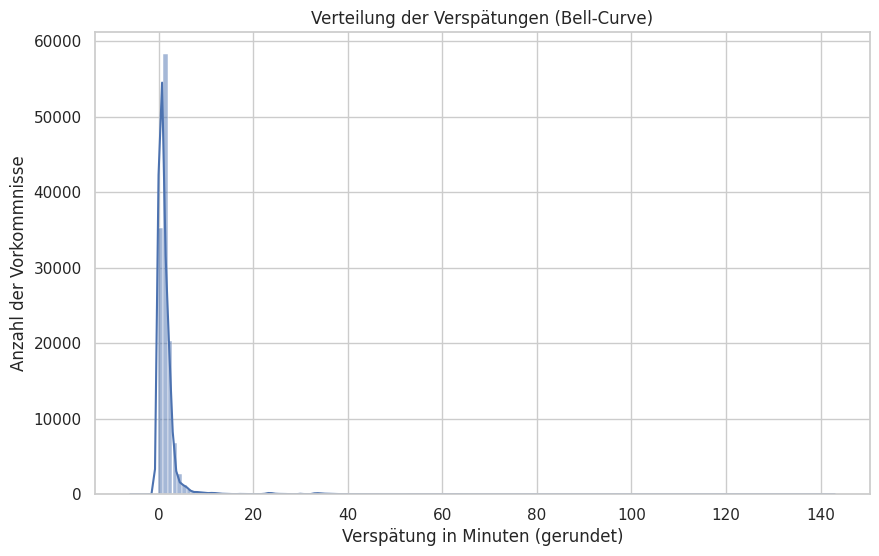

In [ ]:
# Verspätung auf die nächste ganze Minute runden für die Darstellung
sbb_cleaned['Gerundete_Verspätung'] = sbb_cleaned['ZEITDIFFERENZ'].round()

# Setzen des Stils für den Plot
sns.set(style="whitegrid")

# Erstellen eines Histogramms mit einer Kernel Density Estimate (KDE) Kurve
plt.figure(figsize=(10, 6))
sns.histplot(sbb_cleaned['Gerundete_Verspätung'], kde=True, bins=int(sbb_cleaned['Gerundete_Verspätung'].max() - sbb_cleaned['Gerundete_Verspätung'].min() + 1))

# Titel und Labels hinzufügen
plt.title('Verteilung der Verspätungen')
plt.xlabel('Verspätung in Minuten (gerundet)')
plt.ylabel('Anzahl der verspäteten Zugfahrten')

# Anzeigen des Plots
plt.show()


Diese Darstellung ist noch wenig hilfreich, weil der Maximalwert der X-Achse noch viel zu hoch gesetzt ist. Um herauszufinden, was ein sinnvoller Maximalwert wäre, werden das 95. und 99. Perzentil der Verspätungen berechnet.

In [ ]:
# Berechnung des 95. und 99. Perzentils der Verspätungen
perzentil_95 = np.percentile(sbb_cleaned['Gerundete_Verspätung'].dropna(), 95)
perzentil_99 = np.percentile(sbb_cleaned['Gerundete_Verspätung'].dropna(), 99)

print(f"95. Perzentil der Verspätungen: {perzentil_95} Minuten")
print(f"99. Perzentil der Verspätungen: {perzentil_99} Minuten")


95. Perzentil der Verspätungen: 4.0 Minuten
99. Perzentil der Verspätungen: 17.0 Minuten


Dies heisst, dass 95% aller Verspätungen unter 4 Minuten lang sind und 99% aller Verspätungen unter 17 Minuten liegen. Aus diesem Grund wird der Maximalwert der X-Achse auf 20 Minuten gesetzt, damit über 99% aller Verspätungen in der Grafik dargestellt werden.

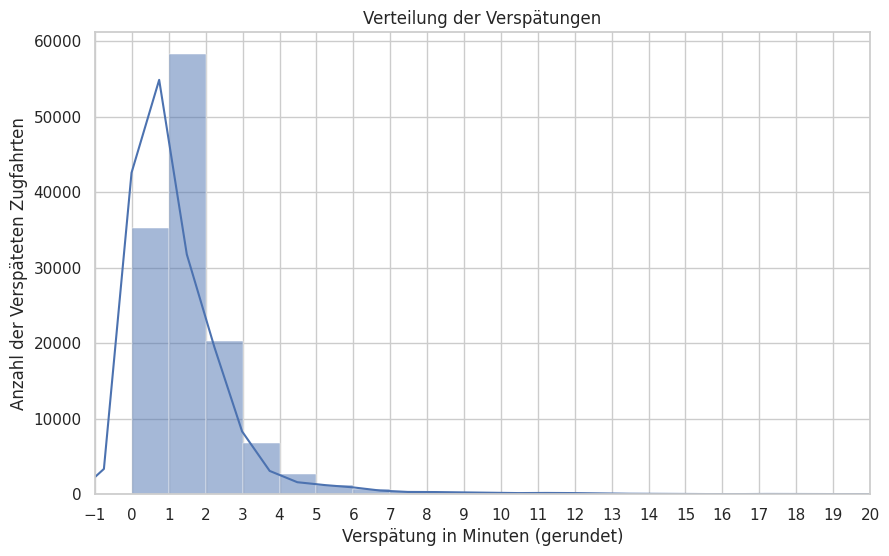

In [ ]:
import matplotlib.ticker as ticker

# Setzen des Stils für den Plot
sns.set(style="whitegrid")

# Erstellen eines Histogramms mit einer Kernel Density Estimate (KDE) Kurve
plt.figure(figsize=(10, 6))
ax = sns.histplot(sbb_cleaned['Gerundete_Verspätung'], kde=True,
                  bins=int(sbb_cleaned['Gerundete_Verspätung'].max() - sbb_cleaned['Gerundete_Verspätung'].min() + 1),
                  binwidth=1)  # Stellen Sie sicher, dass jeder Bin einer Minute entspricht

# Beschränken der X-Achse auf 0 bis 20 Minuten
ax.set_xlim(-1, 20)

# Einstellen der X-Achsen-Ticks auf ganze Zahlen
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))  # Setzt Haupt-Ticks auf jede ganze Zahl

# Titel und Labels hinzufügen
plt.title('Verteilung der Verspätungen')
plt.xlabel('Verspätung in Minuten (gerundet)')
plt.ylabel('Anzahl der Verspäteten Zugfahrten')

# Anzeigen des Plots
plt.show()


### Verspätungen in den Schulferien

### Verspätungen pro Monat

### Verspätungen pro Wochentag

           Gesamtzahl_Fahrten  ZEITDIFFERENZ
WOCHENTAG                                   
Monday                  19037           8243
Tuesday                 18997           8082
Wednesday               18658           8120
Thursday                18689           8366
Friday                  18895           8767
Saturday                19471           6368
Sunday                  19797           6452


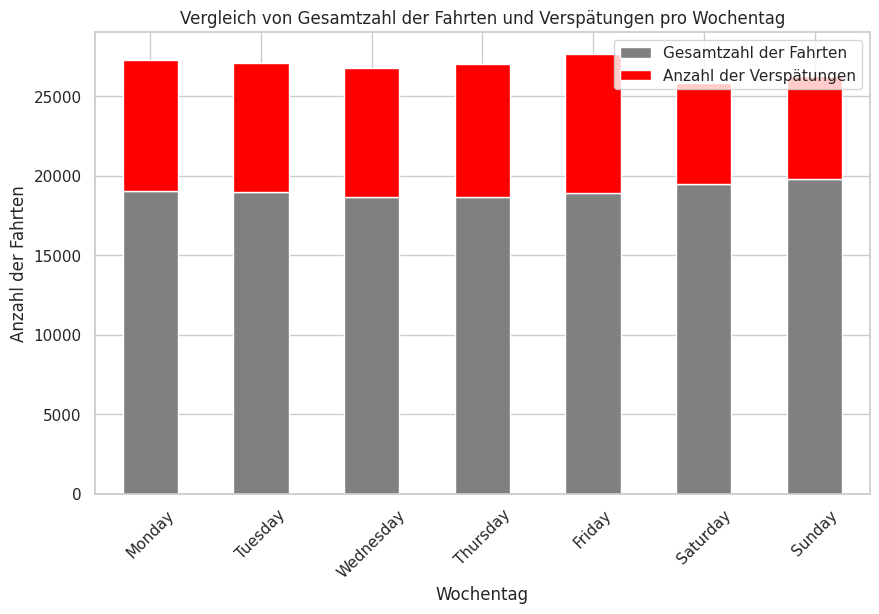

In [ ]:
# Aggregieren der Daten nach Wochentag
wochentag_daten = sbb_cleaned.groupby('WOCHENTAG').agg({
    'FAHRT_BEZEICHNER': 'count',  # Zählt die Anzahl der Fahrten pro Wochentag
    'ZEITDIFFERENZ': lambda x: (x > 1).sum()  # Zählt, wie oft Verspätungen größer als 1 Minute sind
}).rename(columns={'FAHRT_BEZEICHNER': 'Gesamtzahl_Fahrten', 'Verspätungen': 'Anzahl_Verspätungen'})

# Reihenfolge der Wochentage korrigieren
wochentage = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
wochentag_daten = wochentag_daten.reindex(wochentage)

print(wochentag_daten)

# Erstellen des gestapelten Balkendiagramms
fig, ax = plt.subplots(figsize=(10, 6))
wochentag_daten['Gesamtzahl_Fahrten'].plot(kind='bar', color='gray', label='Gesamtzahl der Fahrten', ax=ax)
wochentag_daten['ZEITDIFFERENZ'].plot(kind='bar', color='red', bottom=wochentag_daten['Gesamtzahl_Fahrten'], label='Anzahl der Verspätungen', ax=ax)

# Einstellen der Beschriftungen und Titel
plt.xlabel('Wochentag')
plt.ylabel('Anzahl der Fahrten')
plt.title('Vergleich von Gesamtzahl der Fahrten und Verspätungen pro Wochentag')
plt.xticks(rotation=45)
plt.legend()

plt.show()


In [ ]:
# Erstellen des gestapelten Balkendiagramms
fig, ax = plt.subplots(figsize=(10, 6))
wochentag_daten['Gesamtzahl_Fahrten'].plot(kind='bar', color='gray', label='Gesamtzahl der Fahrten', ax=ax)
wochentag_daten['Anzahl_Verspätungen'].plot(kind='bar', color='red', bottom=wochentag_daten['Gesamtzahl_Fahrten'], label='Anzahl der Verspätungen', ax=ax)

# Einstellen der Beschriftungen und Titel
plt.xlabel('Wochentag')
plt.ylabel('Anzahl der Fahrten')
plt.title('Vergleich von Gesamtzahl der Fahrten und Verspätungen pro Wochentag')
plt.xticks(rotation=45)
plt.legend()

plt.show()


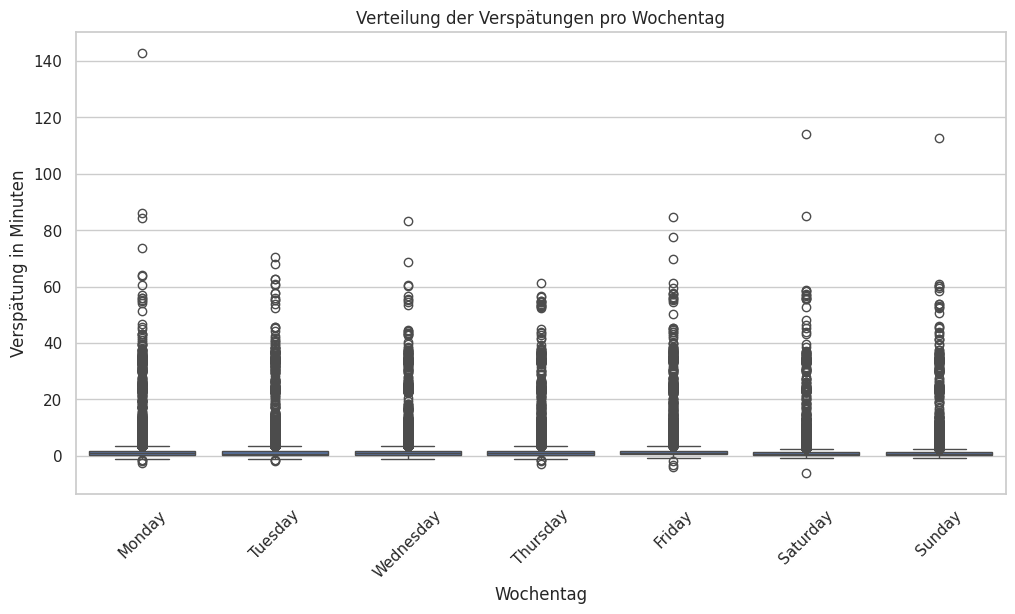

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Einstellen des Visualisierungsstils
sns.set(style="whitegrid")

# Erstellen eines Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='WOCHENTAG', y='ZEITDIFFERENZ', data=sbb_cleaned, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Hinzufügen von Titel und Achsenbeschriftungen
plt.title('Verteilung der Verspätungen pro Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('Verspätung in Minuten')

# Anzeigen des Plots
plt.xticks(rotation=45)  # Dreht die X-Achsen-Beschriftungen für bessere Lesbarkeit
plt.show()


### Verspätungen pro Tageszeit

In der Visualisierung  „Anzahl der Züge pro Stunde“ sind auf der X-Achse die Stunden des Tages abgebildet, die von 0 bis 23 reichen, was eine 24-Stunden-Zeitspanne darstellt. Auf der Y-Achse ist die Anzahl der Züge dargestellt, die für jede Stunde gezählt werden. Es ist ersichtlich, das zwischen Mitternacht und 5 Uhr nur sehr wenige Züge verkehren.

Im anschliessend gezeigten Boxplot-Diagramm "Verspätung pro Stunde" werden die Verspätungen pro Tageszeit visualisiert. Die y-Achse ist auf den Bereich 0 bis 10 Minuten begrenzt um die Boxen und die Whiskers besser auslesen zu können. Die Verspätungen variieren im Tagesverlauf, was durch die unterschiedliche Länge und Position der Boxen und Whiskers für jede Stunde zu sehen ist.
Einige Stunden, insbesondere am frühen Morgen, zeigen eine sehr geringe Streuung der Verspätungen (sehr kurze Boxen und Whiskers), was auf eine zuverlässigere Fahrplanmässigkeit in diesen Zeiten hinweist.
Stunden mit längeren Boxen oder Whiskers zeigen eine größere Variabilität der Verspätungen an. Die ist vor allem in am Morgen um 8 und 9 Uhr und am Nachmittag um 17 und 18 Uhr zu sehen, was mit dem höheren Personensaufkommen zu den Stosszeiten zusammenhängt. Es gibt sichtbare Ausreißer, besonders zu bestimmten Stunden, was auf ungewöhnliche Ereignisse hinweisen könnte, die zu ungewöhnlich langen Verspätungen führten. Die Tatsache, dass der Median in vielen Stunden nahe am unteren Rand der Box liegt, deutet darauf hin, dass die Mehrheit der Züge entweder pünktlich oder nur geringfügig Verspätung aufgewiesen haben.

Wenn wir die beiden Diagramme vergleichen, fäll auf, dass es Stunden gibt, in denen trotz einer hohen Anzahl von Zügen keine entsprechende Zunahme von Verspätungen zu beobachten ist. Das Bahnunternehmen ist also gut auf die Verkehrsspitzen vorbereitet.

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Erstelle eine Kopie von sbb_cleaned für die Analyse der Tageszeiten
sbb_daytime = sbb_cleaned.copy()

In [ ]:
# Berechnung der Anzahl der Züge pro Stunde
trains_hourly = sbb_cleaned['ABFAHRTSZEIT'].dt.hour.value_counts().sort_index()

# Erstellen des Liniendiagramms für die Anzahl der Züge pro Stunde
plt.figure(figsize=(14, 8))
plt.title('Anzahl der Züge pro Stunde')
trains_hourly.plot(kind='line', marker='o', linestyle='-')
plt.ylabel('Anzahl der Züge')
plt.xlabel('Stunde des Tages')
plt.grid(True)
plt.xticks(range(0, 24))  # Stellen Sie sicher, dass alle Stunden auf der X-Achse angezeigt werden
plt.show()

In [ ]:


# Extrahiere die Stunde aus der 'ABFAHRTSZEIT' für die stündliche Analyse
sbb_daytime['STUNDE'] = sbb_cleaned['ABFAHRTSZEIT'].dt.hour

# Erstelle ein Boxplot-Diagramm, das die ZEITDIFFERENZ pro Stunde zeigt
plt.figure(figsize=(15, 6))
plt.title('Verspätung pro Stunde (aus ZEITDIFFERENZ)')
sns.boxplot(x='STUNDE', y='ZEITDIFFERENZ', data=sbb_daytime)
plt.ylabel('Verspätung in Minuten (aus ZEITDIFFERENZ)')
plt.xlabel('Stunde des Tages')
plt.grid(True)
plt.xticks(range(0, 24))  # Sicherstellen, dass alle Stunden auf der X-Achse angezeigt werden
plt.show()

In [ ]:
# Erstelle ein Boxplot-Diagramm, das die ZEITDIFFERENZ pro Stunde zeigt
plt.figure(figsize=(15, 6))
plt.title('Verspätung pro Stunde (aus ZEITDIFFERENZ)')
sns.boxplot(x='STUNDE', y='ZEITDIFFERENZ', data=sbb_daytime)
plt.ylabel('Verspätung in Minuten (aus ZEITDIFFERENZ)')
plt.xlabel('Stunde des Tages')
plt.grid(True)
plt.ylim(0, 10)  # Setze das Limit der Y-Achse auf 60 Minuten
plt.yticks(range(0, 11))  # Einteilung der Y-Achse in 1-Minuten-Schritten
plt.xticks(range(0, 24))  # Sicherstellen, dass alle Stunden auf der X-Achse angezeigt werden
plt.show()

In [ ]:
import plotly.express as px

# Angenommen, sbb_daytime ist Ihr DataFrame und 'STUNDE' sowie 'ZEITDIFFERENZ' sind Spaltennamen
fig = px.box(sbb_daytime, x='STUNDE', y='ZEITDIFFERENZ',
             title='Verspätung pro Stunde (aus ZEITDIFFERENZ)',
             labels={'ZEITDIFFERENZ': 'Verspätung in Minuten (aus ZEITDIFFERENZ)',
                     'STUNDE': 'Stunde des Tages'},
             range_y=[0, 10])  # Setze das Limit der Y-Achse auf 10 Minuten

# Update das Layout, um ein Raster und Anpassungen der X-Achse hinzuzufügen
fig.update_layout(yaxis=dict(tickmode='array', tickvals=list(range(0, 11))),
                  xaxis=dict(tickmode='array', tickvals=list(range(0, 24))),
                  grid=dict(rows=1, columns=1),
                  margin=dict(l=40, r=40, t=40, b=40))

# Zeige den interaktiven Plot an
fig.show()

###Verspätungen in der Nacht, am Morgen, am Nachmittag und am Abend

Das Balkendiagramm mit dem Titel "Anzahl der Zugfahrten pro Tageszeit" stellt die Anzahl der Zugfahrten in vier verschiedenen Zeitblöcken dar: Nacht, Morgen, Nachmittag und Abend. Die X-Achse des Diagramms kategorisiert die Tageszeiten, während die Y-Achse die Anzahl der Fahrten quantifiziert.

-> unterschied zu tageszeit auswerunt ?!

Das Boxplot-Diagramm, zeigt die Verspätung von Zügen pro Tageszeit, wobei die Tageszeiten auf der X-Achse als "Nacht", "Morgen", "Nachmittag" und "Abend" kategorisiert ist. Die Y-Achse zeigt die Verspätung in Minuten und ist auf den Bereich von 0 bis 10 Minuten beschränkt um die Boxen und Whiskers besser auslesen zu können.

Die Box für die Nacht ist sehr kurz, was auf eine geringe Streuung und niedrige Verspätungswerte hinweist. Dies weist auf den reduzierten Fahrplan während der Nachtstunden hin.
Vor allem in den Morgenstunden und am Nachmittag treten die meiten Verspätungen ein wobei der Whisker am Morgen bei 3,5 Minuten liegt, also knapp über den für die SBB als Verspätung geltenden 3 Minuten.

In [ ]:
# Funktion, um Tageszeit zu kategorisieren
def categorize_time(time):
    if time.hour < 6:
        return 'Nacht'
    elif time.hour < 12:
        return 'Morgen'
    elif time.hour < 18:
        return 'Nachmittag'
    else:
        return 'Abend'

# Tageszeit auf Basis der 'ABFAHRTSZEIT' Spalte kategorisieren
sbb_daytime['TAGESZEIT'] = sbb_cleaned['ABFAHRTSZEIT'].apply(categorize_time)

# Die Reihenfolge der Tageszeit als Variable definieren
daytime_order = ['Nacht', 'Morgen', 'Nachmittag', 'Abend']
sbb_daytime['TAGESZEIT'] = pd.Categorical(sbb_daytime['TAGESZEIT'], categories=daytime_order, ordered=True)

# Gruppieren der Daten nach 'Tageszeit' und Zählen der Fahrten
volumen_pro_tageszeit = sbb_daytime.groupby('TAGESZEIT').size()

# Erstellen des Balkendiagramms
plt.figure(figsize=(10, 6))
plt.title('Anzahl der Zugfahrten pro Tageszeit')
volumen_pro_tageszeit.plot(kind='bar')
plt.ylabel('Anzahl der Fahrten')
plt.xlabel('Tageszeit')
plt.grid(True)
plt.show()

In [ ]:
# Boxplot-Diagramm erstellen, das die ZEITDIFFERENZ pro Tageszeit zeigt
plt.figure(figsize=(10, 6))
plt.title('Verspätung pro Tageszeit (aus ZEITDIFFERENZ)')
sns.boxplot(x='TAGESZEIT', y='ZEITDIFFERENZ', data=sbb_daytime, order=daytime_order)
plt.ylabel('Verspätung in Minuten (aus ZEITDIFFERENZ)')
plt.xlabel('Tageszeit')
plt.grid(True)
plt.show()

In [ ]:
# Boxplot-Diagramm erstellen, das die ZEITDIFFERENZ pro Tageszeit zeigt
plt.figure(figsize=(10, 6))
plt.title('Verspätung pro Tageszeit (aus ZEITDIFFERENZ)')
sns.boxplot(x='TAGESZEIT', y='ZEITDIFFERENZ', data=sbb_daytime, order=daytime_order)
plt.ylabel('Verspätung in Minuten (aus ZEITDIFFERENZ)')
plt.xlabel('Tageszeit')
plt.grid(True)
plt.ylim(0, 10)  # Setze das Limit der Y-Achse auf 60 Minuten
plt.yticks(range(0, 11))  # Einteilung der Y-Achse in 1-Minuten-Schritten
plt.show()

In [ ]:
import plotly.express as px

# Angenommen, 'sbb_daytime' ist Ihr DataFrame und 'TAGESZEIT' sowie 'ZEITDIFFERENZ' sind die Spaltennamen
# 'daytime_order' ist eine Liste, die die Reihenfolge der Tageszeiten angibt, z.B. ['Morgen', 'Mittag', 'Abend']

# Erstelle den Boxplot mit Plotly
fig = px.box(sbb_daytime, x='TAGESZEIT', y='ZEITDIFFERENZ',
             title='Verspätung pro Tageszeit (aus ZEITDIFFERENZ)',
             category_orders={'TAGESZEIT': daytime_order},  # Setze die Reihenfolge der Tageszeiten
             labels={'ZEITDIFFERENZ': 'Verspätung in Minuten (aus ZEITDIFFERENZ)',
                     'TAGESZEIT': 'Tageszeit'},
             range_y=[0, 10])  # Setze das Limit der Y-Achse auf 10 Minuten

# Update das Layout, um ein Raster und Anpassungen der X-Achse hinzuzufügen
fig.update_layout(yaxis=dict(tickmode='array', tickvals=list(range(0, 11))),
                  xaxis=dict(tickmode='array'),
                  grid=dict(rows=1, columns=1),
                  margin=dict(l=40, r=40, t=40, b=40))

# Zeige den interaktiven Plot an
fig.show()


### Verspätungen pro Zuglinie

## Analyse der Ausfälle

### Ausfälle vs. gesamte Anzahl Zugfahrten

### Verteilung der Ausfälle allgemein in Bell-Curve/Histogramm

### Ausfälle in den Schulferien

### Ausfälle pro Monat

### Ausfälle pro Wochentag

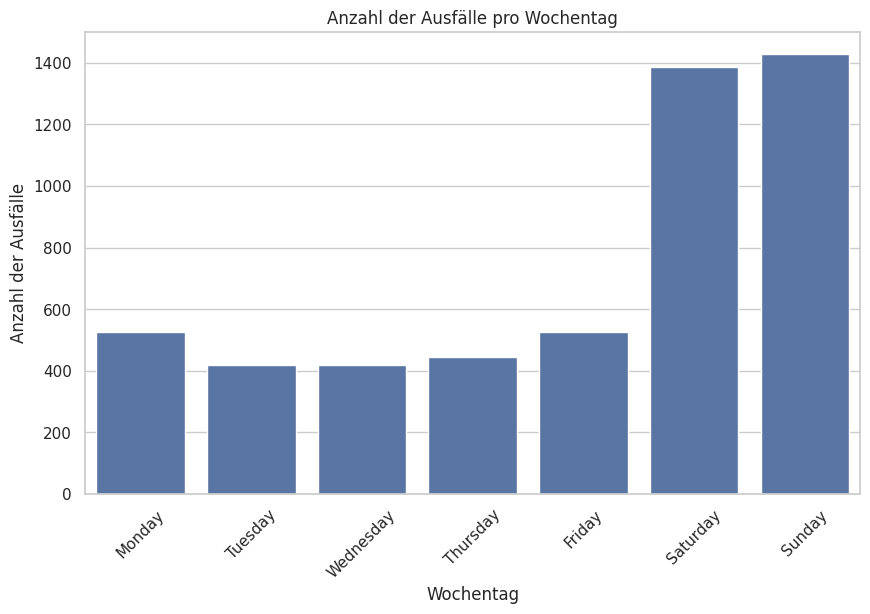

In [ ]:
# Erstellen des Balkendiagramms
plt.figure(figsize=(10, 6))
sns.countplot(x='WOCHENTAG', data=ausfaelle_sbb, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Anzahl der Ausfälle pro Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('Anzahl der Ausfälle')
plt.xticks(rotation=45)
plt.show()


### Ausfälle pro Tageszeit

Das Balkendiagramm mit dem Titel "Anzahl der Ausfälle pro Zugausfälle pro Stunde", stellt die Anzahl der Zugausfälle pro Stunde über einen Zeitraum von 24 Stunden dat. Die Balken sind entlang der X-Achse angeordnet, die von 0 bis 23 die Stunden des Tages repräsentiert, und die Höhe der Balken auf der Y-Achse zeigt die Anzahl der Ausfälle in jeder Stunde an.

In der Nacht und den frühen Morgenstunden (0 - 5 Uhr) gibt es nur wenige Ausfälle, was zu erwarten ist, da in diesen Stunden weniger Züge fahren.
In den Morgenstunden (6 - 9 Uhr) fängt die Anzahl der Ausfälle an zu steigen, was auf den Beginn des Berufsverkehrs hinweist.
Tagsüber (10 - 16 Uhr) ist die Anzahl der Ausfälle relativ konstant und zeigt, dass während des Tages ein regelmässiges Muster von Ausfällen existiert.
Im Abendverkehr (17 - 20 Uhr) gibt es einen Höhepunkt der Zugausfälle, was auf die hohen Verkehrsmengen und das Potenzial für Störungen während der Stosszeiten zurückzuführen sein könnte.
Am Spätabend (21 - 23 Uhr) nimmt die Anzahl der Ausfälle wieder ab, wahrscheinlich weil weniger Züge fahren und die Stosszeiten vorüber sind.
Der höchste Balken liegt in den späten Abendstunden mit 377 Ausfällen.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Angenommen, 'sbb_daytime' ist Ihr DataFrame und enthält die Spalten 'ABFAHRTSZEIT' und 'FAELLT_AUS_TF'

# Extrahiere die Stunde aus der Abfahrtszeit
sbb_daytime['Stunde'] = sbb_daytime['ABFAHRTSZEIT'].dt.hour

# Berechne die Anzahl der Ausfälle pro Stunde
ausfaelle_pro_stunde = sbb_daytime.groupby('Stunde')['FAELLT_AUS_TF'].sum()

# Erstelle ein Balkendiagramm der Ausfälle pro Stunde
plt.figure(figsize=(12, 6))
bars = plt.bar(ausfaelle_pro_stunde.index, ausfaelle_pro_stunde.values, color='blue')
plt.title('Anzahl der Zugausfälle pro Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Ausfälle')
plt.xticks(range(0, 24))  # Einstellung, damit alle Stunden des Tages angezeigt werden
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Füge Annotations zu jedem Balken hinzu
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, int(yval), ha='center', va='bottom')

plt.show()


### Ausfälle pro Zuglinie

# Sandboxes

## Sandbox Allan

In [ ]:
import plotly.express as px

# Erstellen eines Histogramms mit Plotly Express
fig = px.histogram(sbb_cleaned, x='Gerundete_Verspätung',
                   nbins=int(sbb_cleaned['Gerundete_Verspätung'].max() - sbb_cleaned['Gerundete_Verspätung'].min() + 1),
                   title='Verteilung der Verspätungen (Bell-Curve)',
                   labels={'Gerundete_Verspätung': 'Verspätung in Minuten (gerundet)'},
                   marginal='rug',  # optional: fügt ein "rug plot" an der x-Achse hinzu
                   template='plotly_white')

# Begrenzen der x-Achse auf 40 Minuten
fig.update_xaxes(range=[0, 40])

# Anzeigen des interaktiven Plots
fig.show()


## Sandbox Fabio

### Verspätungen pro Zuglinie

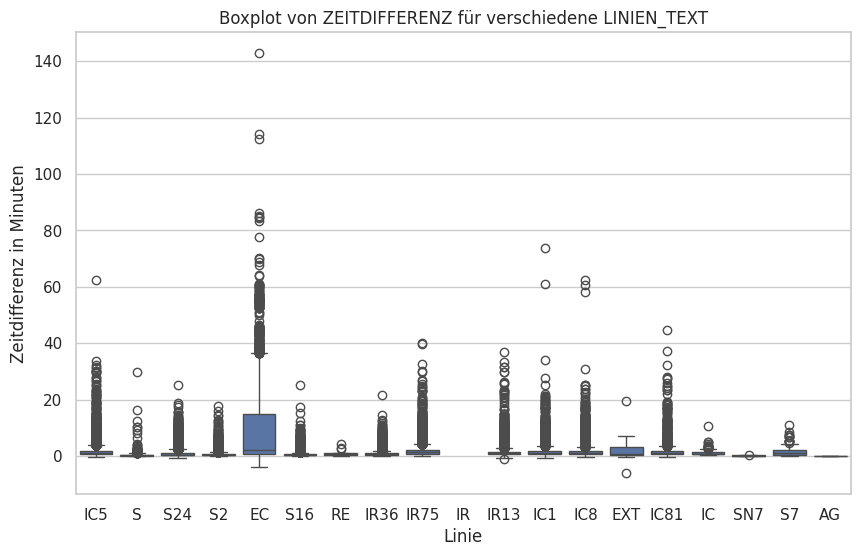

In [ ]:
# Grösse des Plots festlegen
plt.figure(figsize=(10, 6))

# Boxplot mit Seaborn erstellen
sns.boxplot(data=sbb_cleaned, x='LINIEN_TEXT', y='ZEITDIFFERENZ')

# Achsenbeschriftungen und Titel hinzufügen
plt.xlabel('Linie')
plt.ylabel('Zeitdifferenz in Minuten')
plt.title('Boxplot von ZEITDIFFERENZ für verschiedene LINIEN_TEXT')

# Plot anzeigen
plt.show()

In einem ersten Schritt wurden die Boxplots für jede Zuglinie erstellt. Dabei ist zu erkennen, dass insbesondere der EuroCity (EC) oft und viel Verspätung hat.

Auf den ersten Blick ist kein Unterschied zu erkennen zwischen dem Fern- und Nahverkehr. Um die Daten noch genauer zu analyisieren wurden deshalb die durchschnittlichen Verspätungen berechnet und ausgegeben.

In [ ]:
# Berechne die durchschnittliche Verspätung für jede Zuglinie
average_delay_per_line = sbb_cleaned.groupby('LINIEN_TEXT')['ZEITDIFFERENZ'].mean().reset_index()
print(average_delay_per_line)

   LINIEN_TEXT  ZEITDIFFERENZ
0           AG       0.000000
1           EC      10.030637
2          EXT       2.728125
3           IC       1.264887
4          IC1       1.639053
5          IC5       1.707826
6          IC8       1.646686
7         IC81       1.741494
8           IR            NaN
9         IR13       1.379107
10        IR36       1.109434
11        IR75       1.907778
12          RE       1.117593
13           S       0.620291
14         S16       0.719934
15          S2       0.684861
16         S24       0.938922
17          S7       1.692899
18         SN7       0.298810



Nun ist zu erkennen, dass die durchschnittlichen Verspätungen für verschiedene Zuglinien erheblich variieren.

Die Zuglinie 'AG' hat im Durchschnitt keine Verspätung, da für diese Linie keine Daten vorhanden sind. Deshalb kann diese Linie auch für die weiteren Interpretationen ignoriert werden. Auch der IR kann irngoriert weden. Denn die Linie weist NaN (Not a Number) als durchschnittliche Verspätung auf, was ebenfalls darauf hindeutet, dass möglicherweise keine Daten für diese Linie vorhanden sind oder dass die Verspätungen so unregelmässig sind, dass kein aussagekräftiger Durchschnitt berechnet werden kann.

Für die EuroCity-Linie (EC) beträgt die durchschnittliche Verspätung etwa 10 Minuten. Wie bereits oben angetönt, deutet dies darauf hin, dass diese Linie tendenziell etwas unzuverlässiger ist als andere.

Die Linien 'S' und 'SN7' haben relativ geringe durchschnittliche Verspätungen von etwa 0,6 bzw. 0,3 Minuten, was auf eine gute Pünktlichkeit dieser Linien hinweist.

Die Linien wie 'S16', 'S2' und 'S24' weisen durchschnittliche Verspätungen von weniger als 1 Minute auf, was auf eine aussergewöhnliche Pünktlichkeit dieser Regionalzuglinien hinweist. Selbst bei den Fernverkehrslinien wie 'IC' und 'IR' liegen die durchschnittlichen Verspätungen im Bereich von etwa 1 bis 2 Minuten, was im Vergleich zu vielen anderen Bahnsystemen auf der Welt als äusserst zuverlässig angesehen werden kann.

Zusammengefasst kann festegehalten werden, dass die durchschnittlichen Verspätungen für die meisten Zuglinien sich zwischen etwa 0,6 und 2 Minuten bewegen. Dies spricht für die bemerkenswerte Pünktlichkeit der SBB, die weltweit bekannt ist. Diese konsistent niedrigen durchschnittlichen Verspätungen deuten darauf hin, dass die SBB ein hohes Mass an Effizienz und Präzision in ihrem Betrieb aufrechterhalten. Das kann sowohl für Pendler als auch für Reisende von grosser Bedeutung sein.

Nichtsdestotrotz ist es wichtig zu beachten, dass die durchschnittliche Verspätung als alleinige Metrik möglicherweise nicht ausreicht, um die Pünktlichkeit einer Zuglinie vollständig zu bewerten. Andere Faktoren wie die Häufigkeit von Verspätungen, die maximale Verspätung und die Verfügbarkeit von alternativen Transportmöglichkeiten müssen ebenfalls berücksichtigt werden.

### Alternative Visualisierungen der Verspätungen je Zuglinie

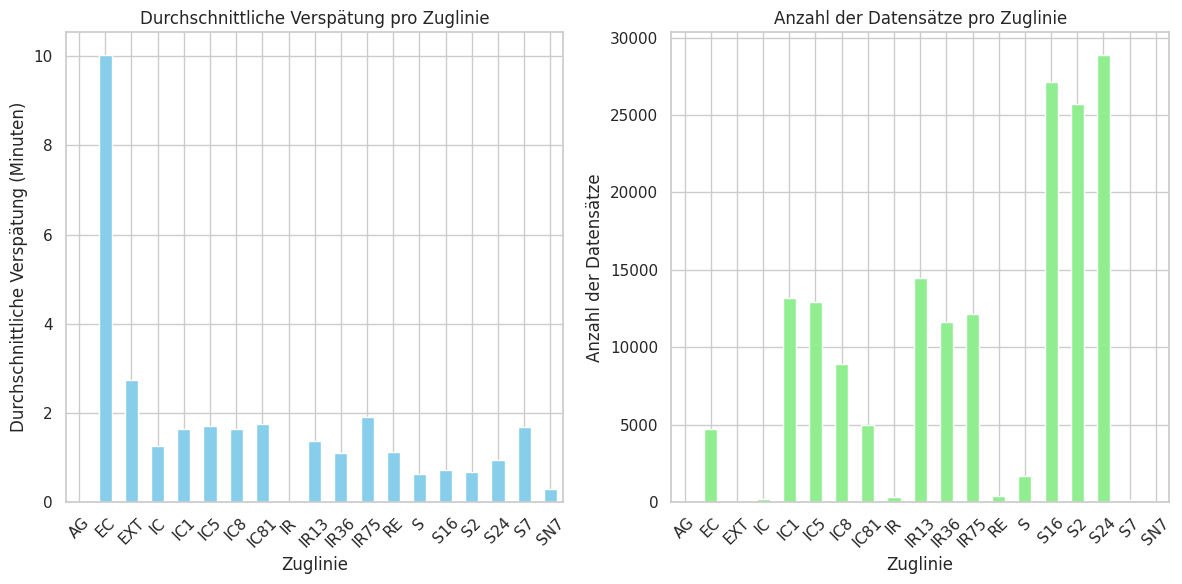

In [ ]:
# Berechnung der durchschnittlichen Verspätung und Anzahl der Datensätze für jede Zuglinie
average_delay_per_line = sbb_cleaned.groupby('LINIEN_TEXT')['ZEITDIFFERENZ'].mean()
count_per_line = sbb_cleaned['LINIEN_TEXT'].value_counts()

# Sortieren nach Alphabet
average_delay_per_line = average_delay_per_line.sort_index()
count_per_line = count_per_line.sort_index()

# Erstellung des Dashboards
plt.figure(figsize=(12, 6))

# Plot der durchschnittlichen Verspätung
plt.subplot(1, 2, 1)
average_delay_per_line.plot(kind='bar', color='skyblue')
plt.title('Durchschnittliche Verspätung pro Zuglinie')
plt.xlabel('Zuglinie')
plt.ylabel('Durchschnittliche Verspätung (Minuten)')
plt.xticks(rotation=45)

# Plot der Anzahl der Datensätze
plt.subplot(1, 2, 2)
count_per_line.plot(kind='bar', color='lightgreen')
plt.title('Anzahl der Datensätze pro Zuglinie')
plt.xlabel('Zuglinie')
plt.ylabel('Anzahl der Datensätze')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()




In [ ]:
import pandas as pd

# Konvertiere count_per_line in ein DataFrame
count_table = pd.DataFrame(count_per_line)
count_table.columns = ['Anzahl der Datensätze']

print(count_table)

             Anzahl der Datensätze
LINIEN_TEXT                       
AG                               1
EC                            4749
EXT                             19
IC                             208
IC1                          13197
IC5                          12906
IC8                           8922
IC81                          4951
IR                             365
IR13                         14469
IR36                         11605
IR75                         12152
RE                             380
S                             1657
S16                          27157
S2                           25706
S24                          28893
S7                             169
SN7                             14


In [ ]:
# Ensure your DataFrame is named sbb_cleaned
# with columns 'LINIEN_TEXT' and 'ZEITDIFFERENZ'

# Aggregate stress levels by Zuglinien (average in this example)
line_stress = sbb_cleaned.groupby('LINIEN_TEXT')['ZEITDIFFERENZ'].mean().reset_index()

# Sort by ZEITDIFFERENZ ascending
line_stress = line_stress.sort_values(by='ZEITDIFFERENZ')

# Ensure the data is suitable for a heatmap; we need a matrix form.
# In this case, we'll create a dummy variable for the heatmap.
line_stress['dummy'] = 1  # Creating a dummy column for plotting

# Pivot for heatmap
heatmap_data = line_stress.pivot_table(index="LINIEN_TEXT", columns="dummy", values="ZEITDIFFERENZ")

# Plotting the heatmap
plt.figure(figsize=(10, 7))  # Adjust the size as needed
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".2f", cbar_kws={'label': 'Average delay'})
plt.title("Average delay by train lines (desc)")
plt.xlabel("Average delay")
plt.ylabel("Train lines")
plt.xticks(rotation=90)  # Rotate the train line names for better visibility
plt.show()


#Fazit und Ausblick

Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet. Lorem ipsum dolor sit amet, consetetur sadipscing elitr, sed diam nonumy eirmod tempor invidunt ut labore et dolore magna aliquyam erat, sed diam voluptua. At vero eos et accusam et justo duo dolores et ea rebum. Stet clita kasd gubergren, no sea takimata sanctus est Lorem ipsum dolor sit amet.